In [1]:
from pathlib import Path
import json
import pandas as pd

In [5]:
names = {
    "faster_rcnn_R_50_C4_3x.yaml": "Faster-RCNN + C4",
    "faster_rcnn_R_50_DC5_3x.yaml": "Faster-RCNN + DC5",
    "faster_rcnn_R_50_FPN_3x.yaml": "Faster-RCNN + FPN",
    "retinanet_R_50_FPN_1x.yaml": "RetinaNet + FPN"
}

Holdout off-the-shelf AP50 plot

In [14]:
off_shelf_path = Path("/home/pau/Documents/master/M6/project/data/results/COCO-Detection")
results_holdout_offshelf = {}

for hd_path in off_shelf_path.glob("*"):
    with open(hd_path / "holdout" / "stats_offshelf.json", 'r') as f_json:
        result_json = json.load(f_json)
    results_holdout_offshelf[names[hd_path.parts[-1]]] = result_json["bbox"]

results_holdout_offshelf = pd.DataFrame.from_dict(results_holdout_offshelf)
results_holdout_offshelf

,RetinaNet + FPN,Faster-RCNN + FPN,Faster-RCNN + DC5,Faster-RCNN + C4
AP,27.070558,21.407463,20.683600,21.674668
AP50,50.852972,33.543244,32.498210,33.713873
AP75,23.719738,21.620389,20.957408,21.576435
APs,NaN,NaN,NaN,NaN
APm,18.442872,15.915268,15.251175,16.290924
APl,58.582072,43.909007,43.186690,43.040585
AP-<unused>,NaN,NaN,NaN,NaN
AP-bike,8.871690,0.248168,0.060641,0.404521
AP-car,45.269426,42.566759,41.306559,42.944814


K-Fold off-the-shelf AP50 plot

In [42]:
off_shelf_path = Path("/home/pau/Documents/master/M6/project/data/results/COCO-Detection")
results_kfold_offshelf = {}

for hd_path in off_shelf_path.glob("*"):
    results_kfold_offshelf[names[hd_path.parts[-1]]] = []
    for kf_path in hd_path.glob("fold*"):
        with open(kf_path / "stats_offshelf.json", 'r') as f_json:
            result_json = json.load(f_json)
        results_kfold_offshelf[names[hd_path.parts[-1]]].append(result_json["bbox"])

for k, v in results_kfold_offshelf.items():
    results_averaged = {}
    for ii in v:
        for k2, v2 in ii.items():
            if k2 not in results_averaged.keys():
                results_averaged[k2] = v2
            else:
                results_averaged[k2] += v2
    for kk, vv in results_averaged.items():
        results_averaged[kk] = vv / len(v)
    results_kfold_offshelf[k] = results_averaged
results_kfold_offshelf = pd.DataFrame.from_dict(results_kfold_offshelf)
results_kfold_offshelf

,RetinaNet + FPN,Faster-RCNN + FPN,Faster-RCNN + DC5,Faster-RCNN + C4
AP,27.806597,22.012811,20.892861,21.881670
AP50,51.871808,36.155793,33.181560,34.010792
AP75,23.767733,21.562214,20.910428,21.505232
APs,NaN,NaN,NaN,NaN
APm,18.771024,16.193566,15.506145,16.438420
APl,58.513703,46.537008,44.603333,44.538983
AP-<unused>,NaN,NaN,NaN,NaN
AP-bike,10.401194,1.380884,0.242270,0.649264
AP-car,45.211999,42.644738,41.543452,43.114075


Holdout trained AP50 plot

In [46]:
trained_path = Path("/home/pau/Documents/master/M6/project/repo/w3/results/train_holdout")
results_holdout_trained = {}

other_names = {
    "faster_c4": "Faster-RCNN + C4",
    "faster_dc5": "Faster-RCNN + DC5",
    "faster_fpn": "Faster-RCNN + FPN",
    "retina_r50": "RetinaNet + FPN"
}

for hd_path in trained_path.glob("*"):
    with open(hd_path / "stats.json", 'r') as f_json:
        result_json = json.load(f_json)
    results_holdout_trained[other_names[hd_path.parts[-1]]] = result_json["bbox"]

results_holdout_trained = pd.DataFrame.from_dict(results_holdout_trained)
results_holdout_trained

,Faster-RCNN + C4,Faster-RCNN + DC5,RetinaNet + FPN,Faster-RCNN + FPN
AP,73.874471,74.709780,78.961807,72.771651
AP50,94.959700,95.872640,95.812511,95.629954
AP75,85.450180,87.571073,87.462968,78.499453
APs,NaN,NaN,NaN,NaN
APm,69.918074,69.772359,72.883064,66.281667
APl,77.927943,79.462461,83.845475,77.208881
AP-car,86.205623,84.675847,86.547128,87.361416
AP-bike,61.543320,64.743713,71.376486,58.181885


In [49]:
trained_path = Path("/home/pau/Documents/master/M6/project/data/results/COCO-Detection")
results_kfold_trained = {}

for hd_path in trained_path.glob("*"):
    results_kfold_trained[names[hd_path.parts[-1]]] = []
    for kf_path in hd_path.glob("fold*"):
        with open(kf_path / "stats.json", 'r') as f_json:
            result_json = json.load(f_json)
        results_kfold_trained[names[hd_path.parts[-1]]].append(result_json["bbox"])

for k, v in results_kfold_trained.items():
    results_averaged = {}
    for ii in v:
        for k2, v2 in ii.items():
            if k2 not in results_averaged.keys():
                results_averaged[k2] = v2
            else:
                results_averaged[k2] += v2
    for kk, vv in results_averaged.items():
        results_averaged[kk] = vv / len(v)
    results_kfold_trained[k] = results_averaged
results_kfold_trained = pd.DataFrame.from_dict(results_kfold_trained)
results_kfold_trained

,RetinaNet + FPN,Faster-RCNN + FPN,Faster-RCNN + DC5,Faster-RCNN + C4
AP,84.880156,84.547976,85.024775,85.102802
AP50,97.848359,97.264695,97.612882,97.371155
AP75,93.585186,94.319609,94.297761,93.994797
APs,NaN,NaN,NaN,NaN
APm,80.734339,80.010830,80.783175,80.817261
APl,89.001036,88.066924,89.342381,89.115832
AP-car,89.614642,91.055725,89.692910,90.548901
AP-bike,80.145669,78.040227,80.356640,79.656704


In [54]:
out_path = Path("/home/pau/Documents/master/M6/project/repo/w3/results")

results_kfold_offshelf.to_csv(out_path / "kfold_offshelf.csv")
results_kfold_trained.to_csv(out_path / "kfold_trained.csv")
results_holdout_offshelf.to_csv(out_path / "holdout_offshelf.csv")
results_holdout_trained.to_csv(out_path / "holdout_trained.csv")

results_kfold_offshelf.to_markdown(out_path / "kfold_offshelf.md")
results_kfold_trained.to_markdown(out_path / "kfold_trained.md")
results_holdout_offshelf.to_markdown(out_path / "holdout_offshelf.md")
results_holdout_trained.to_markdown(out_path / "holdout_trained.md")

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def plot_summary(plot_results, title, output):
    col_labels = list(plot_results.T.index)
    sort_ind = np.argsort(col_labels)
    col_labels.sort()
    ncols = len(col_labels)

    plt.figure(dpi=150, figsize=(10, 6))
    plt.style.use('ggplot')
    plt.title(title)
    x_barplot = np.arange(ncols)
    plt.bar(x=x_barplot - 0.2, height=plot_results.loc["AP50"][sort_ind], width=0.4)
    plt.bar(x=x_barplot + 0.2, height=plot_results.loc["AP75"][sort_ind], width=0.4)
    plt.xticks(x_barplot,  col_labels)
    plt.ylim((0.0, 100.0))

    plt.xlabel("Model")
    plt.ylabel("AP")

    plt.legend(["AP@50", "AP@75"])
    plt.tight_layout()
    plt.savefig(output)
    plt.show()
    plt.close()

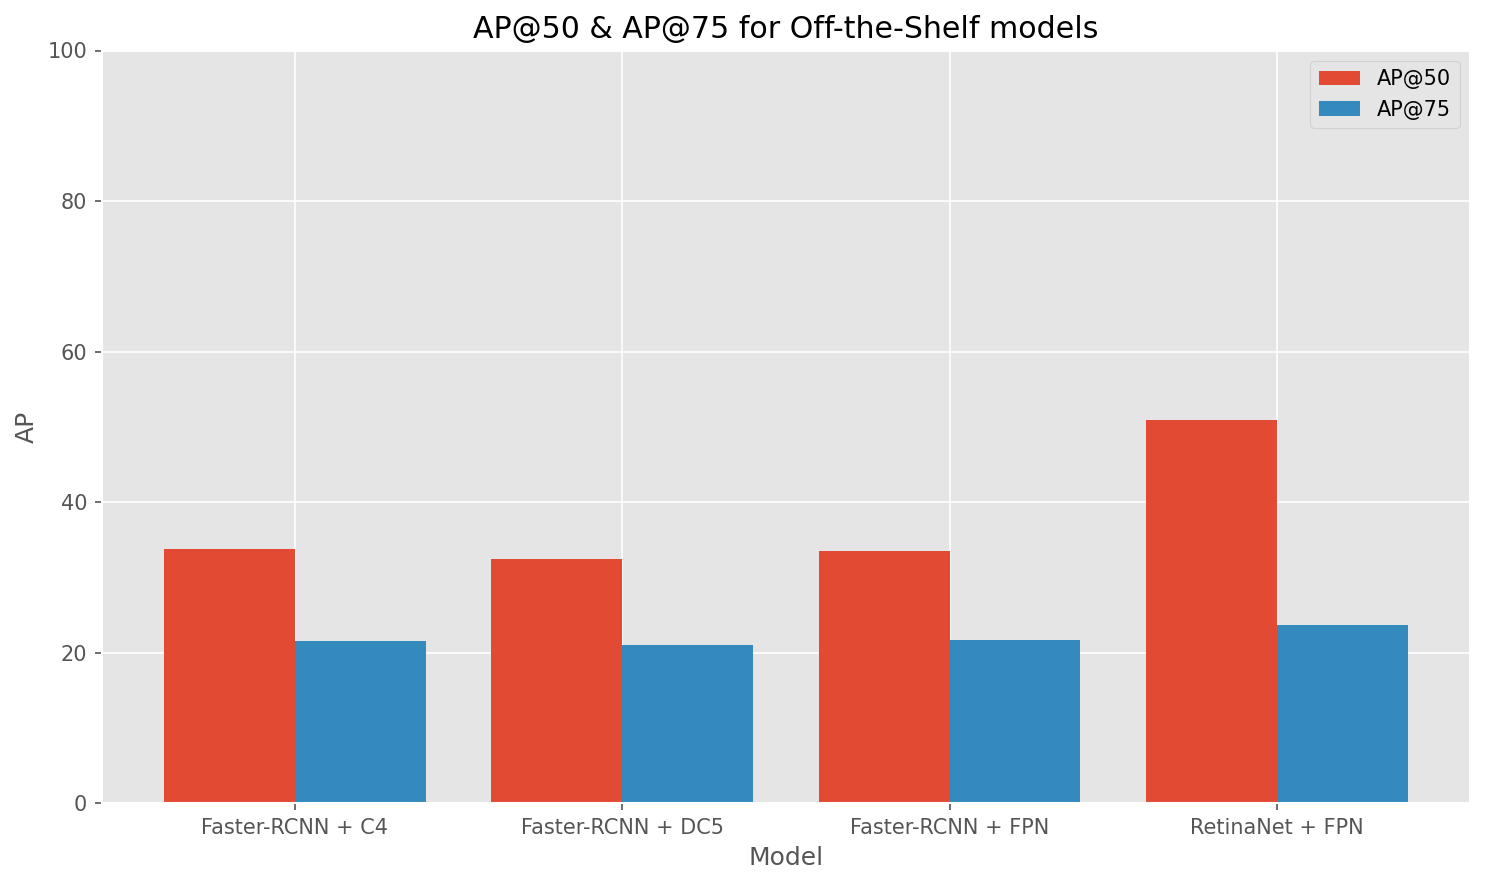

In [93]:
plot_summary(
    results_holdout_offshelf,
    "AP@50 & AP@75 for Off-the-Shelf models",
    "/home/pau/Documents/master/M6/project/repo/w3/results/plot_offshelf.png"
)

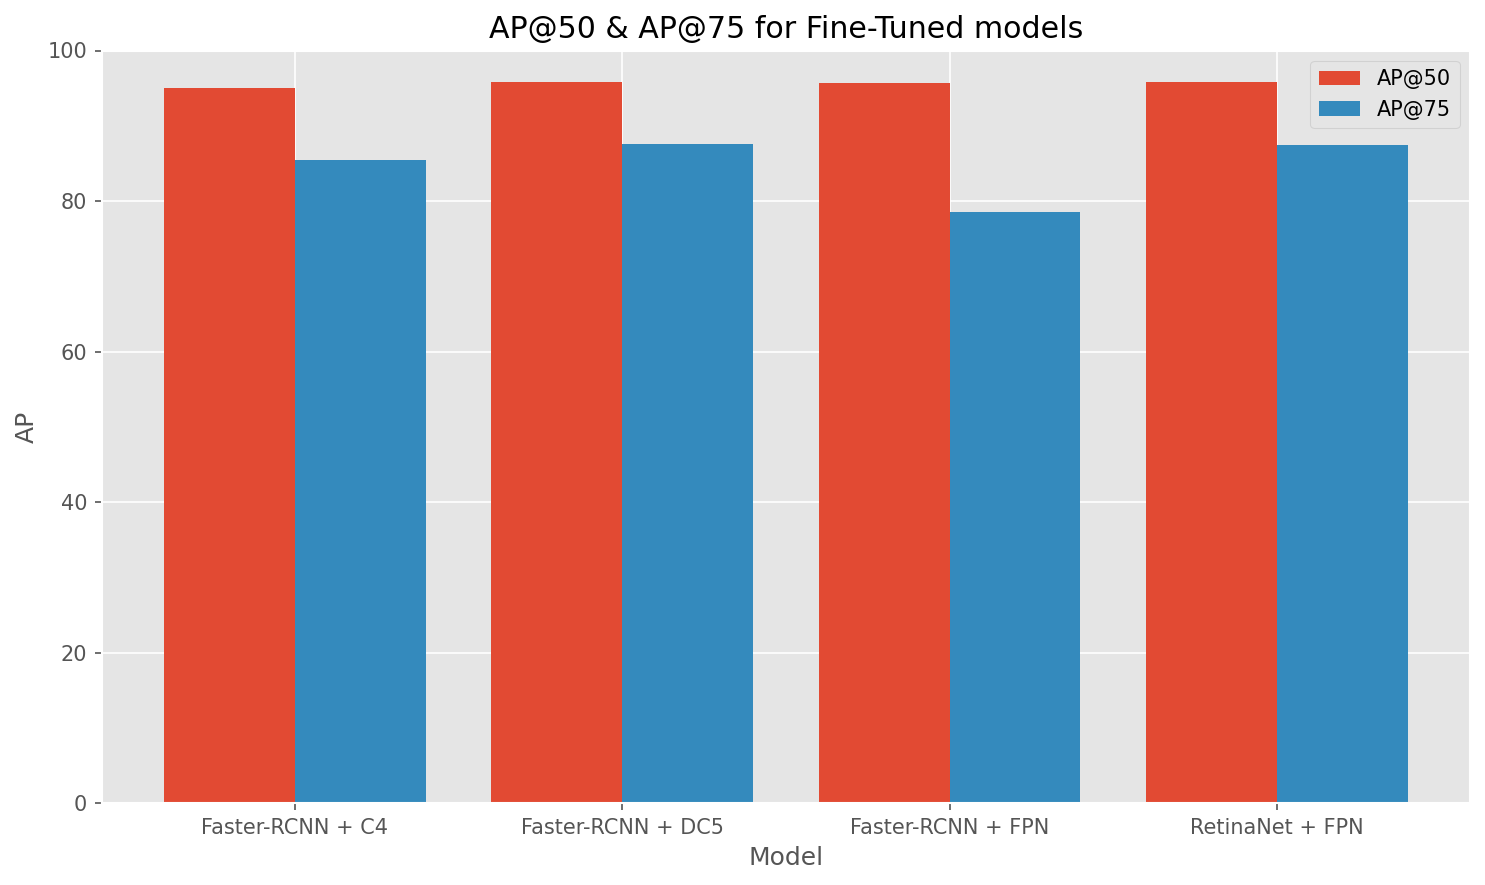

In [94]:
plot_summary(
    results_holdout_trained,
    "AP@50 & AP@75 for Fine-Tuned models",
    "/home/pau/Documents/master/M6/project/repo/w3/results/plot_ft.png"
)